In [1]:
import math

class ConvexHull:
    def __init__(self, points):
        self.hull = self.convex_hull_2d(points)
    
    def convex_hull_2d(self, points):
        if len(points) <= 4:
            return self.find_convex_hull_graham(points)
        else:
            midpoint = int(len(points)/2)
            left_hull = self.convex_hull_2d(points[:midpoint])
            right_hull = self.convex_hull_2d(points[midpoint:])
        return self.merge_hull(left_hull, right_hull)


    def sort_points_ccw(self,points):
        center = tuple(map(sum, zip(*points)))  # Find the centroid of the points
        angles = []
        for point in points:
            x, y = point
            angle = math.atan2(y - center[1], x - center[0])
            angles.append((angle, point))
        angles.sort()
        return [point for angle, point in angles]

    import math

    from math import atan2

    def polar_angle(self, p0, p1):
        x, y = p1[0] - p0[0], p1[1] - p0[1]
        return math.atan2(y, x)
    
    def sort_points(self, reference_point, points):
        return sorted(points, key=lambda point: self.polar_angle(reference_point, point))

    def find_convex_hull_graham(self, points):
        reference_point = min(points, key=lambda point: (point[1], point[0]))

        sorted_points = sorted(points, key=lambda point: self.polar_angle(reference_point, point))

        stack = [sorted_points[0], sorted_points[1], sorted_points[2]]

        for point in sorted_points[3:]:
            while len(stack) >= 2 and abs(self.polar_angle(stack[-2], stack[-1])) >= abs(self.polar_angle(stack[-1], point)):
                stack.pop()

            stack.append(point)

        return stack
    
    def y(self, i, j, left_hull, right_hull):
        # Find the y-intercept of the line and points provided
        p1 = left_hull[i]
        p2 = right_hull[j]
        m = (p2[1] - p1[1]) / (p2[0] - p1[0])
        b = p1[1] - m * p1[0]
        return m * (self.middle) + b
    
    def find_upper_tangent(self, i, j, left_hull, right_hull):
        # Find the y-intercept of the line between the rightmost point of the left hull
        # and the leftmost point of the right hull
        p,q = len(left_hull),len(right_hull)
        
        s = self.y(i,j, left_hull, right_hull)

        while self.y(i,(j-1)%q,left_hull,right_hull) > s or self.y((i+1)%p,j,left_hull,right_hull) > s:
            if self.y(i, (j-1)%q, left_hull, right_hull) > s:
                j -= 1
                j %= q
                s = self.y(i, j, left_hull, right_hull)
            elif self.y((i+1)%p, j, left_hull, right_hull) > s:
                i += 1
                i %= p
                s = self.y(i, j, left_hull, right_hull)

        return (i, j)
    
    def find_lower_tangent(self,i, j, left_hull, right_hull):
        # Find the y-intercept of the line between the rightmost point of the left hull
        # and the leftmost point of the right hull
        p,q = len(left_hull),len(right_hull)
        s = self.y(i,j, left_hull, right_hull)

        while self.y(i,(j+1)%q,left_hull,right_hull) < s or self.y((i-1)%p,j,left_hull,right_hull) < s:
            if self.y((i-1)%p, j, left_hull, right_hull) < s:
                i -= 1
                i %= len(left_hull)
                s = self.y(i, j, left_hull, right_hull)
            elif self.y(i, (j+1)%q, left_hull, right_hull) < s:
                j += 1
                j %= q
                s = self.y(i, j, left_hull, right_hull)

        return (i, j)
    
    def merge_lists(self, lower_hull, upper_hull, lower_tangent, upper_tangent):
        # Find the indices of the points corresponding to the lower and upper tangents
        i = lower_hull.index(lower_tangent[0])
        j = lower_hull.index(upper_tangent[0])

        ii = upper_hull.index(lower_tangent[1])
        jj = upper_hull.index(upper_tangent[1])

        # Remove the points between the lower and upper tangents, if any

        merged_hull = []
        
        
        #removes points in between tangents: for example [(0,1),(1,2),(2,3),(3,4),(4,5),(5,6),(6,7)], and (3,6) would
        #become [(0,1),(1,2),(2,3),(3,6),(6,7)]
        while i != j:
            merged_hull.append(lower_hull[i])
            i += 1
            i %= len(lower_hull)
        merged_hull.append(lower_hull[j])
        
        while jj != ii:
            merged_hull.append(upper_hull[jj])
            jj += 1
            jj %= len(upper_hull)
        merged_hull.append(upper_hull[jj])
            
        return merged_hull
    
    def merge_hull(self, left_hull, right_hull):
        # sort left_hull counterclockwise and right_hull clockwise based on center point
        left_center = [sum(p[0] for p in left_hull)/len(left_hull), sum(p[1] for p in left_hull)/len(left_hull)]
        left_hull = sorted(left_hull, key=lambda p: (math.atan2(p[1]-left_center[1], p[0]-left_center[0]), -p[1]))
        right_center = [sum(p[0] for p in right_hull)/len(right_hull), sum(p[1] for p in right_hull)/len(right_hull)]
        right_hull = sorted(right_hull, key=lambda p: (math.atan2(p[1]-right_center[1], p[0]-right_center[0]), p[1]))

        # find leftmost and rightmost points
        rightmost = max(left_hull, key=lambda p: p[0])
        self.middle = rightmost[0]
        rightmost = left_hull.index(rightmost)
        leftmost = min(right_hull, key=lambda p: p[0])
        self.middle += leftmost[0]
        leftmost = right_hull.index(leftmost)
        self.middle /= 2

        # find upper and lower tangents

        i, j = self.find_upper_tangent(rightmost, leftmost, left_hull, right_hull)
        ii, jj = self.find_lower_tangent(rightmost, leftmost, left_hull, right_hull)
        return self.merge_lists(left_hull,right_hull, [left_hull[i],right_hull[j]], [left_hull[ii],right_hull[jj]])


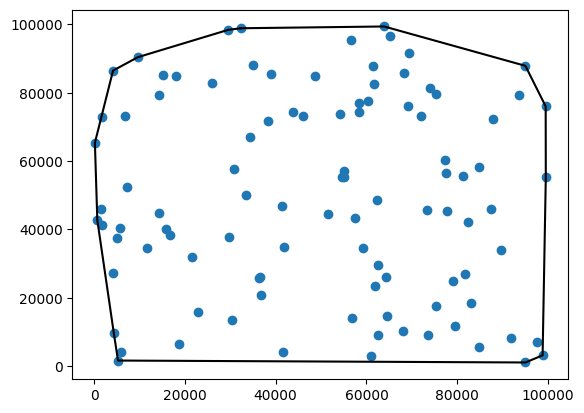

In [2]:
if __name__ == '__main__':
    import random

    # Set the bounds of the space
    min_coord = (0, 0)
    max_coord = (100000, 100000)

    # Generate 10,000 random points
    points = sorted([(random.uniform(min_coord[0], max_coord[0]), random.uniform(min_coord[1], max_coord[1])) for i in range(100)])
    hull = ConvexHull(points)

    import matplotlib.pyplot as plt

    # Plot the points as blue dots
    x, y = zip(*points)
    plt.scatter(x, y)

    line = hull.hull
    line.append(hull.hull[0])
    # Draw the lines
    x, y = zip(*line)
    plt.plot(x, y, 'black')

    # Show the plot
    plt.show()